<a href="https://colab.research.google.com/github/iMrugesh9/Clustering_sentiment_Zomato/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lightgbm import LGBMClassifier
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('omw-1.4')
import gensim
from gensim.models import Word2Vec
from nltk.stem.wordnet import WordNetLemmatizer



[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading first dataset
dataset_restos=pd.read_csv('/content/drive/MyDrive/Datasets/UNsuper/Zomato Restaurant names and Metadata.csv')

In [ ]:
# Loading second Dataset
Dataset_reviews=pd.read_csv('/content/drive/MyDrive/Datasets/UNsuper/Zomato Restaurant reviews.csv')


In [ ]:
# observing dataset
dataset_restos.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# observing dataset
dataset_restos.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
# observing dataset
Dataset_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# observing dataset
Dataset_reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In the restaurant dataset, the Name refers to the Name of the Restaurants. 

In [ ]:
# changing Name to Restaurant
dataset_restos.rename(columns={'Name':'Restaurant'},inplace=True)


In [ ]:
# merging two datasets on Restaurant column
Dataset=pd.merge(dataset_restos,Dataset_reviews,on='Restaurant')

In [ ]:
Dataset.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# data columns summary of restaurant dataset
dataset_restos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Restaurant   105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


As we can see there are 5 attributes for 105 unique restaurants are provided, out of which Collections column has 51 Null values, and Timings has 1 Null value.

In [ ]:
# data columns summary of review dataset
Dataset_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Review Dataset has 10000 entries of reviews with 6 attributes for each reviews. Except Pictures, every column has Null values, although the Null value fraction is less than 1%. 

In [ ]:
# Cost unique values
dataset_restos.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

# EDA



*   Cost Values have commas in the values, so the format of the Cost values need to change.
*   The Links Column is of no use, it is just an information.
*   Collections has more than 50% Null values, So the column needs to be dropped.




In [ ]:
# changing cost values datatype and formatting
dataset_restos['Cost']=dataset_restos.Cost.str.replace(',','')
dataset_restos['Cost']=dataset_restos['Cost'].astype(float)

In [ ]:
# dropping collection column
X=dataset_restos.iloc[:,2:]
X.drop(columns='Collections',inplace=True)
X

,Cost,Cuisines,Timings
0,800.0,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,800.0,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,1300.0,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,800.0,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,1200.0,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...
100,600.0,"Fast Food, Salad",11 AM to 11 PM
101,200.0,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,500.0,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,250.0,Fast Food,8am to 12:30AM (Mon-Sun)


There Are more than one cuisines for most of the resturants, We must find the unique cuisines and their count. 

In [ ]:
# Timing unique values
dataset_restos['Timings'].value_counts()

11 AM to 11 PM                                                                                                                                                              6
12 Noon to 11 PM                                                                                                                                                            5
12 Noon to 12 Midnight                                                                                                                                                      5
12 Noon to 10:30 PM                                                                                                                                                         3
11:30 AM to 1 AM                                                                                                                                                            3
                                                                                                                                  

As we can see, there are 77 unique entries in all different format for Timings column. Now it will be impractical to clean and transform 77 unique  values for 105 total values. So for further analysis, Timings will not be considered.

In [ ]:
# removing unnecassary spaces in cuisines column
X['Cuisines']=X.Cuisines.str.replace(' ','')

In [ ]:
# Cuisine counter
cuisines_list=[]
cuisines_counter={}
for i in X.Cuisines:
  temp=i.split(',')
  for j in temp:
    if j not in cuisines_list:
      cuisines_list.append(j)
      cuisines_counter[j]=1
    else:
      cuisines_counter[j]=cuisines_counter[j]+1
    
len(cuisines_list)

44

In [ ]:
# Cuisine counter data frame
df_cuisine_count=pd.DataFrame({'Cuisines':cuisines_counter.keys(),'Count':cuisines_counter.values()})

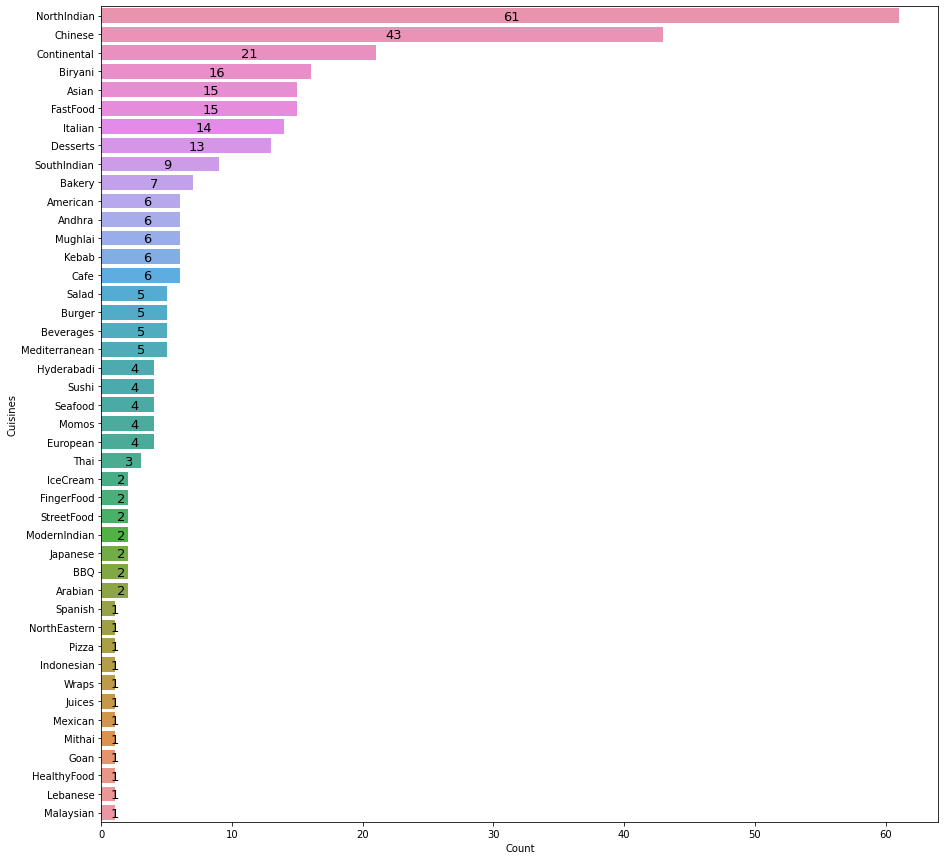

In [ ]:
# plotting cuisine counts
plt.figure(figsize=(15,15))
ax=sns.barplot(x='Count',y='Cuisines',data=df_cuisine_count,order=df_cuisine_count.sort_values('Count').Cuisines)
plt.gca().invert_yaxis()
for p in ax.patches:
  _x = ( p.get_x() + p.get_width() + float(0.4))/2
  _y = p.get_y() + p.get_height()*0.2
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left",fontsize=13)



As we can see only 8 cuisines have double-digit counts out of 44 distinct cuisines. Now it would be ineffective if we consider 44 distinct cuisines for clustering as there are only 105 restaurants to cluster. It can be useful if we categorize these cuisines in to more understandable *cuisine category*, based on the attribute to cluster the restaurants easily.

In [ ]:
# categorizing the cuisines
keywords_temp={'overseas':['Chinese','Continental','European','Asian','Mediterranean','Lebanese','American','BBQ','Italian','Japanese','Sushi','Mexican','Mughlai','Arabian','Spanish','Thai','Indonesian','Malaysian'],
          'North_Indian' : ['Kebab','NorthIndian','Biryani','ModernIndian','NorthEastern'],
          'South_Indian' :['SouthIndian','Goan','Andhra','Hyderabadi','Seafood'],
         'Fast_food' : ['FastFood','Beverages','StreetFood','FingerFood','Burger','Salad','Bakery','Juices','Cafe','Wraps','Momos','Pizza'],
         'IceCream_sweets' : ['Desserts','IceCream','Mithai','HealthyFood'],
         }


In [ ]:
# dictoinary for cuisine category-cuisine pairs
keywords = {}
for key,value in keywords_temp.items():
    for val in value:
        if val in keywords:
            keywords[val].append(key)
        else:
            keywords[val] = key
keywords            

{'Chinese': 'overseas',
 'Continental': 'overseas',
 'European': 'overseas',
 'Asian': 'overseas',
 'Mediterranean': 'overseas',
 'Lebanese': 'overseas',
 'American': 'overseas',
 'BBQ': 'overseas',
 'Italian': 'overseas',
 'Japanese': 'overseas',
 'Sushi': 'overseas',
 'Mexican': 'overseas',
 'Mughlai': 'overseas',
 'Arabian': 'overseas',
 'Spanish': 'overseas',
 'Thai': 'overseas',
 'Indonesian': 'overseas',
 'Malaysian': 'overseas',
 'Kebab': 'North_Indian',
 'NorthIndian': 'North_Indian',
 'Biryani': 'North_Indian',
 'ModernIndian': 'North_Indian',
 'NorthEastern': 'North_Indian',
 'SouthIndian': 'South_Indian',
 'Goan': 'South_Indian',
 'Andhra': 'South_Indian',
 'Hyderabadi': 'South_Indian',
 'Seafood': 'South_Indian',
 'FastFood': 'Fast_food',
 'Beverages': 'Fast_food',
 'StreetFood': 'Fast_food',
 'FingerFood': 'Fast_food',
 'Burger': 'Fast_food',
 'Salad': 'Fast_food',
 'Bakery': 'Fast_food',
 'Juices': 'Fast_food',
 'Cafe': 'Fast_food',
 'Wraps': 'Fast_food',
 'Momos': 'Fast_

In [ ]:
# function for categorizing the cuisines
def rename_cuisines(cuisine):
  newlist=[]
  str=cuisine.split(',')
  newlist=[x.replace(x,keywords[x]) for x in str]
  str1=""
  for ele in newlist: 
    str1 += ele+','
  return str1


In [ ]:
# preparing the dataset with renamed cuisines
X_cat=X.copy()
X_cat['Cuisines']=X.Cuisines.apply(rename_cuisines)
X_cat


,Cost,Cuisines,Timings
0,800.0,"overseas,overseas,North_Indian,overseas,South_...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,800.0,"North_Indian,North_Indian,overseas,",11 AM to 11 PM
2,1300.0,"overseas,overseas,North_Indian,IceCream_sweets,","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,800.0,"North_Indian,North_Indian,overseas,South_India...",12 Noon to 2 AM
4,1200.0,"overseas,overseas,North_Indian,overseas,overseas,","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...
100,600.0,"Fast_food,Fast_food,",11 AM to 11 PM
101,200.0,"Fast_food,IceCream_sweets,","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,500.0,"North_Indian,North_Indian,overseas,",12 Noon to 11 PM
103,250.0,"Fast_food,",8am to 12:30AM (Mon-Sun)


Now that the cuisines are categorized proparly, in order to use it for clustering converting them to numeric form can be helpful. CountVectorizer can be useful for doing that. 

In [ ]:
# CountVectorizer for counting cuisine categories
count_vectorizer = CountVectorizer()
C_train_count = count_vectorizer.fit_transform(X_cat.Cuisines)
C_train_count.toarray()[:2]
cuisines_columns=count_vectorizer.vocabulary_.keys()

In [ ]:
count_vectorizer.get_feature_names()

['fast_food', 'icecream_sweets', 'north_indian', 'overseas', 'south_indian']

In [ ]:
# Converting to dataframe
Cuisine_df=pd.DataFrame(C_train_count.todense(), columns=count_vectorizer.get_feature_names())

In [ ]:
Cuisine_df

,fast_food,icecream_sweets,north_indian,overseas,south_indian
0,0,0,2,3,1
1,0,0,2,1,0
2,0,1,1,2,0
3,1,0,2,1,1
4,0,0,1,4,0
...,...,...,...,...,...
100,2,0,0,0,0
101,1,1,0,0,0
102,0,0,2,1,0
103,1,0,0,0,0


Most restaurants have mixed cuisine categories. It can be interesting to see the distribution of cuisine categories for such restaurants.

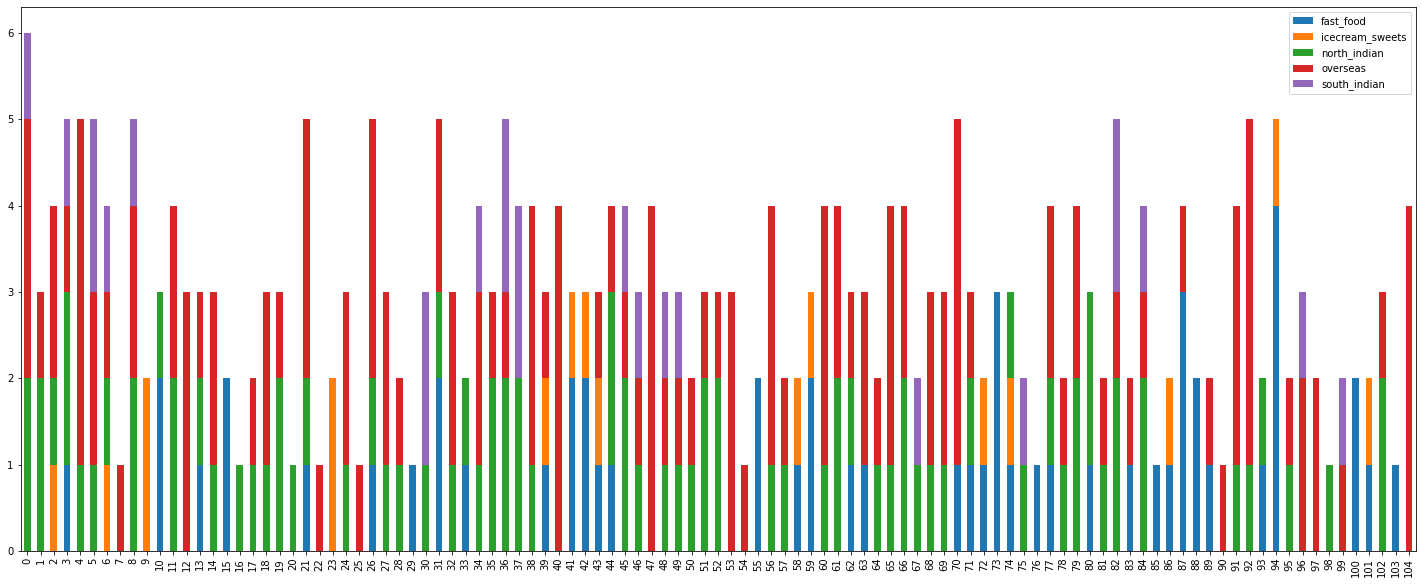

In [ ]:
# plotting bar plot of cuisine categories
Cuisine_df.plot(kind='bar', stacked=True,figsize=(25,10))


As we can see most restaurants has multiple categories mixed, although some has one dominating category.

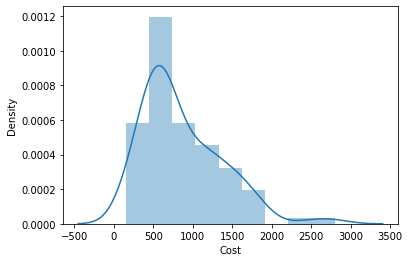

In [ ]:
# Cost distribution
sns.distplot(dataset_restos['Cost'])
plt.show()

Cost values distribution is very close to normal distributions as we can see in the plot above. 

In [ ]:
#description of cost values 
dataset_restos.describe()['Cost']

count     105.000000
mean      861.428571
std       510.149730
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [ ]:
# Preparing data for clustering
X_train=pd.concat([X.Cost,Cuisine_df],axis=1)
X_train


,Cost,fast_food,icecream_sweets,north_indian,overseas,south_indian
0,800.0,0,0,2,3,1
1,800.0,0,0,2,1,0
2,1300.0,0,1,1,2,0
3,800.0,1,0,2,1,1
4,1200.0,0,0,1,4,0
...,...,...,...,...,...,...
100,600.0,2,0,0,0,0
101,200.0,1,1,0,0,0
102,500.0,0,0,2,1,0
103,250.0,1,0,0,0,0


In [ ]:
# Normalizing cost column
X_train_norm=X_train.copy()
scaler_rec_mon=preprocessing.StandardScaler()
X_train_norm=scaler_rec_mon.fit_transform(X_train)

# Clustering

In [ ]:
# libraries for shap 
from sklearn.model_selection import cross_val_score
!pip install shap
import shap 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.9 MB/s 


## KMeans

In [ ]:
# experimenting with range of number of clusters
X_rec_mon=X_train.values.copy()
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_rec_mon)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_rec_mon, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6509930042899373
For n_clusters = 3, silhouette score is 0.5899448802060923
For n_clusters = 4, silhouette score is 0.5907809917310518
For n_clusters = 5, silhouette score is 0.554290642689755
For n_clusters = 6, silhouette score is 0.5873980456701143
For n_clusters = 7, silhouette score is 0.5790355596078034
For n_clusters = 8, silhouette score is 0.5949224628136482
For n_clusters = 9, silhouette score is 0.625141153860996
For n_clusters = 10, silhouette score is 0.6316049867036635


From silhoute score with KMeans , optimum number of clusters with 0.651 score is 2.

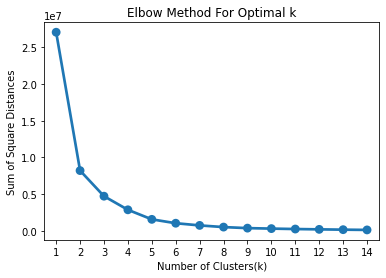

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_rec_mon)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method also confirms the same number of optimum clusters.

We can further validate the efficacy, we can fit the data to machine learning model and check f1 score.

In [ ]:
# building KMeans model 
clusterer_km = KMeans(n_clusters=2)
clusters_km= clusterer_km.fit_predict(X_rec_mon)

In [ ]:
# building classifier model
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, X_rec_mon, clusters_km, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 1.0


### Explainability

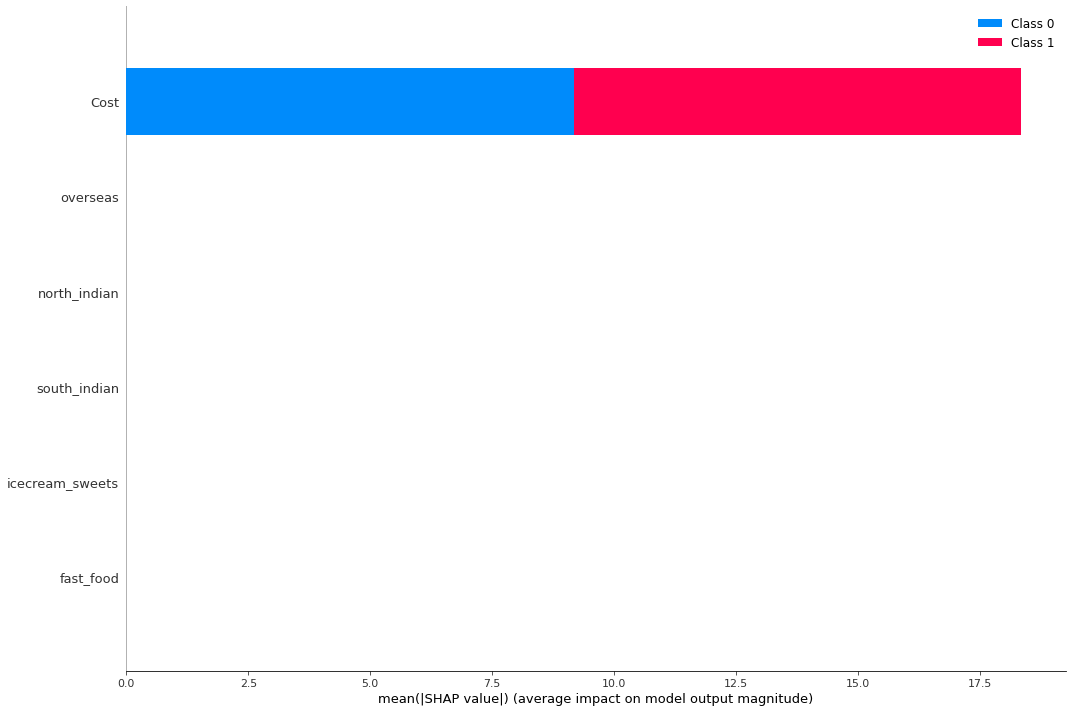

In [ ]:
# shap value explainer
clf_kp.fit(X_rec_mon, clusters_km)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_km = explainer_kp.shap_values(X_rec_mon)
shap.summary_plot(shap_values_km, X_train, plot_type="bar", plot_size=(15, 10))


We can see that Only cost is the important feature for clustering, using KMeans.

### Normalized values

Similar analysis for normalized values.

In [ ]:
X_rec_mon=X_train_norm.copy()
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_rec_mon)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X_rec_mon, preds)

Optimum number of cluster is 5 for normalized values, considering silhoute score using KMeans method.

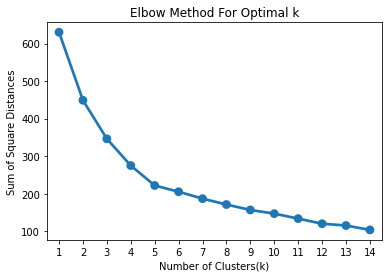

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_rec_mon)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method confirms the same.

In [ ]:
clusterer_km = KMeans(n_clusters=5)
clusters_km= clusterer_km.fit_predict(X_rec_mon)

In [ ]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, X_rec_mon, clusters_km, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.5191246848389706


F1 score of 0.86 is achieved for the classifier model, which is moderate code.

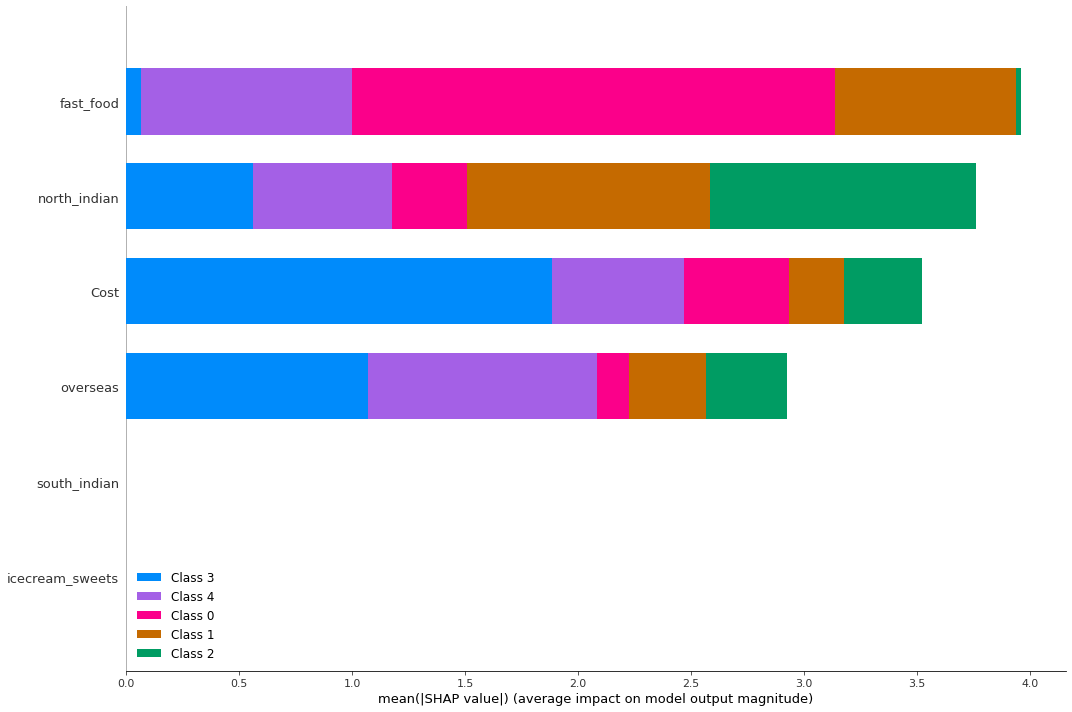

In [ ]:
clf_kp.fit(X_rec_mon, clusters_km)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_km = explainer_kp.shap_values(X_rec_mon)
shap.summary_plot(shap_values_km, X_train, plot_type="bar", plot_size=(15, 10))


When the normalized values are considered for clustering we can see there is a contributions from other features as well, with fast_food and north_indian category being the most important features.




## Hierarchichal  

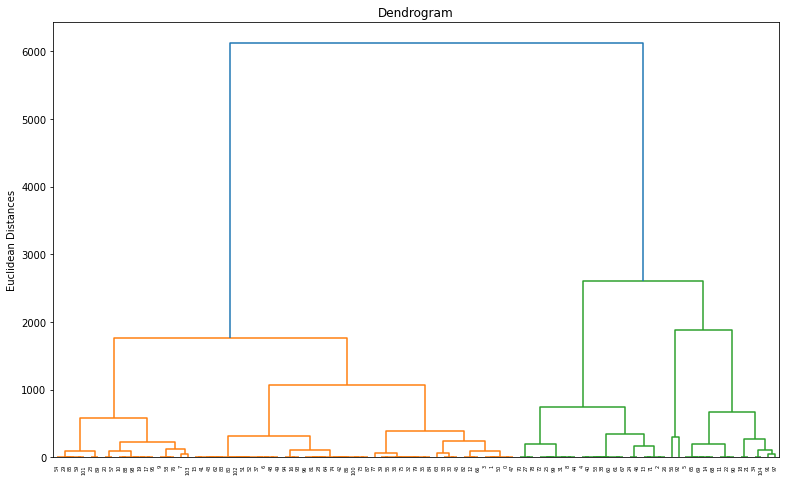

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

For actual values, optimum number of clusters according to Dendrogram is 2. 

### Normalized Values

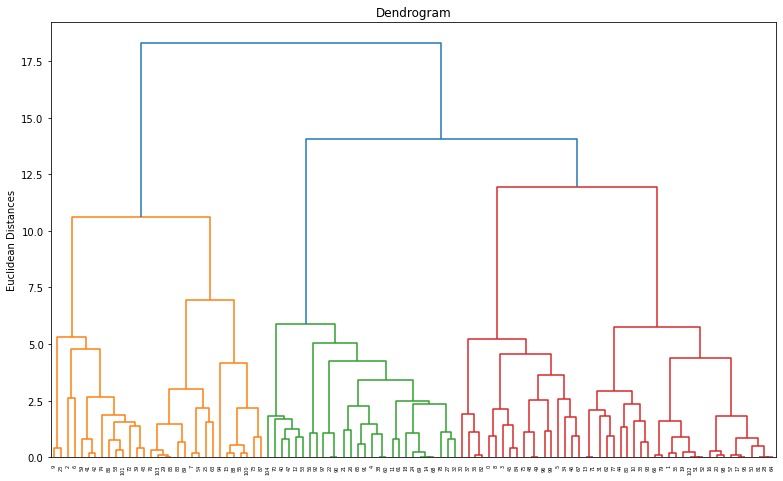

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X_train_norm, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

For Normalized values, optimized number of clusters is 3.

## KPrototypes

In [ ]:
#downloading the kmodes library
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# extracting dataset values
mark_array=X_train.values

In [ ]:
# converting the numerical features into float data type
mark_array[:, 0] = mark_array[:, 0].astype(float)


In [ ]:
costs=[]
for i in range(2,7):
  kproto = KPrototypes(n_clusters=i, verbose=2,max_iter=20)
  clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5]);
  costs.append(kproto.cost_)
  print("For n_clusters = {}, cost is {}".format(n_clusters, kproto.cost_))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3, ncost: 8252028.448949905
Run: 1, iteration: 2/20, moves: 0, ncost: 8252028.448949905
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 11, ncost: 10824316.207750922
Run: 2, iteration: 2/20, moves: 17, ncost: 8286423.88901839
Run: 2, iteration: 3/20, moves: 2, ncost: 8252028.448949905
Run: 2, iteration: 4/20, moves: 0, ncost: 8252028.448949905
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 9, ncost: 8375181.915015087
Run: 3, iteration: 2/20, moves: 0, ncost: 8375181.915015087
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 3, ncost: 8252028.448949905
Run: 4, iteration: 2/20, moves: 0, ncost: 8252028.448949905
In

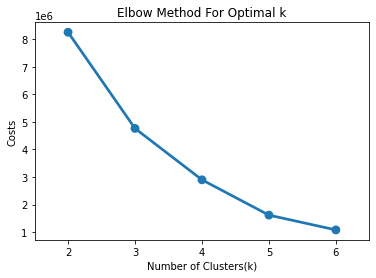

In [ ]:
sns.pointplot(x = list(range(2,7)), y = costs)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Costs')
plt.title('Elbow Method For Optimal k')
plt.show()

For KPrototype method, acoording to elbow method optimum number of clusters is 3.

In [ ]:

kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5]);

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 4, ncost: 4761374.924906865
Run: 1, iteration: 2/20, moves: 0, ncost: 4761374.924906865
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 21, ncost: 4802346.182622914
Run: 2, iteration: 2/20, moves: 2, ncost: 4761374.924906865
Run: 2, iteration: 3/20, moves: 0, ncost: 4761374.924906865
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 31, ncost: 5533204.972917528
Run: 3, iteration: 2/20, moves: 13, ncost: 5151490.846188277
Run: 3, iteration: 3/20, moves: 0, ncost: 5151490.846188277
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 4, ncost: 4963114.747387816
Run:

In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [ ]:
X_kprop=X_train.copy()
X_kprop['cluster']=cluster_dict
X_kprop

,Cost,fast_food,icecream_sweets,north_indian,overseas,south_indian,cluster
0,800.0,0,0,2,3,1,1
1,800.0,0,0,2,1,0,1
2,1300.0,0,1,1,2,0,2
3,800.0,1,0,2,1,1,1
4,1200.0,0,0,1,4,0,2
...,...,...,...,...,...,...,...
100,600.0,2,0,0,0,0,1
101,200.0,1,1,0,0,0,1
102,500.0,0,0,2,1,0,1
103,250.0,1,0,0,0,0,1


In [ ]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, mark_array, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.8575889507318077


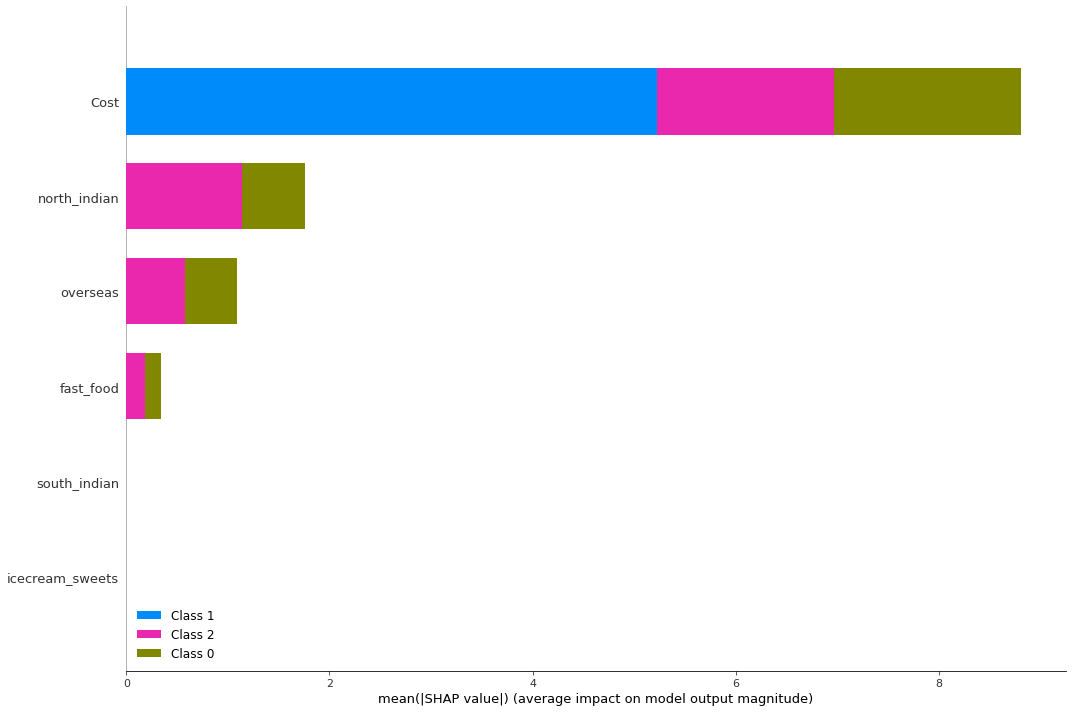

In [ ]:
clf_kp.fit(mark_array, clusters)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(mark_array)
shap.summary_plot(shap_values_kp, X_train, plot_type="bar", plot_size=(15, 10))


As we can see for actual value, KPrototype method has optimum cluster number is 3. And upon fitting the data with classifier, produced 0.91 f1 score which is excellent.
And SHAP explainer shows that cost is the primary feature for clustering, with overseas category as secondary feature.
Class 2 has highest effct by cost, while class 1 is affected by fast_food and noeth_indian categories. Class 0 is mostly shared among overseas and cost.

### Normalized values

In [ ]:
mark_array=X_train_norm.copy()

In [ ]:
mark_array[:, 0] = mark_array[:, 0].astype(float)


In [ ]:
costs=[]
for i in range(2,7):
  kproto = KPrototypes(n_clusters=i, verbose=2,max_iter=20)
  clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5]);
  costs.append(kproto.cost_)
  print("For n_clusters = {}, cost is {}".format(n_clusters, kproto.cost_))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 21, ncost: 124.78276205456511
Run: 1, iteration: 2/20, moves: 8, ncost: 122.33163744164882
Run: 1, iteration: 3/20, moves: 1, ncost: 122.29302620374673
Run: 1, iteration: 4/20, moves: 0, ncost: 122.29302620374673
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 22, ncost: 142.30777443757924
Run: 2, iteration: 2/20, moves: 18, ncost: 129.90711357926614
Run: 2, iteration: 3/20, moves: 12, ncost: 123.40143141551539
Run: 2, iteration: 4/20, moves: 2, ncost: 122.26773079939886
Run: 2, iteration: 5/20, moves: 0, ncost: 122.26773079939886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 19, ncost: 139.40178323234673
Run: 3, iteration: 2/20, moves: 14, ncost: 128.8606024361971
Run: 3, 

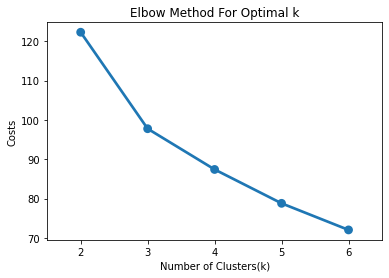

In [ ]:
sns.pointplot(x = list(range(2,7)), y = costs)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Costs')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 3, 4, 5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 24, ncost: 106.10034547971567
Run: 1, iteration: 2/20, moves: 13, ncost: 98.13629597753717
Run: 1, iteration: 3/20, moves: 10, ncost: 97.92350001083545
Run: 1, iteration: 4/20, moves: 0, ncost: 97.92350001083545
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 33, ncost: 105.25206108530561
Run: 2, iteration: 2/20, moves: 8, ncost: 105.22036393120987
Run: 2, iteration: 3/20, moves: 0, ncost: 105.22036393120987
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 26, ncost: 98.34484086276626
Run: 3, iteration: 2/20, moves: 8, ncost: 97.90334519441409
Run: 3, iteration: 3/20, moves: 0, ncost: 97.90334519441409
Init: initializing centroids
Init: initializing clusters
Starting iteration

In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [ ]:
X_kprop=X_train.copy()
X_kprop['cluster']=cluster_dict
X_kprop

,Cost,fast_food,icecream_sweets,north_indian,overseas,south_indian,cluster
0,800.0,0,0,2,3,1,0
1,800.0,0,0,2,1,0,0
2,1300.0,0,1,1,2,0,2
3,800.0,1,0,2,1,1,0
4,1200.0,0,0,1,4,0,2
...,...,...,...,...,...,...,...
100,600.0,2,0,0,0,0,1
101,200.0,1,1,0,0,0,1
102,500.0,0,0,2,1,0,0
103,250.0,1,0,0,0,0,1


In [ ]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8,random_state=50)
cv_scores_kp = cross_val_score(clf_kp, mark_array, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.9293732499747538


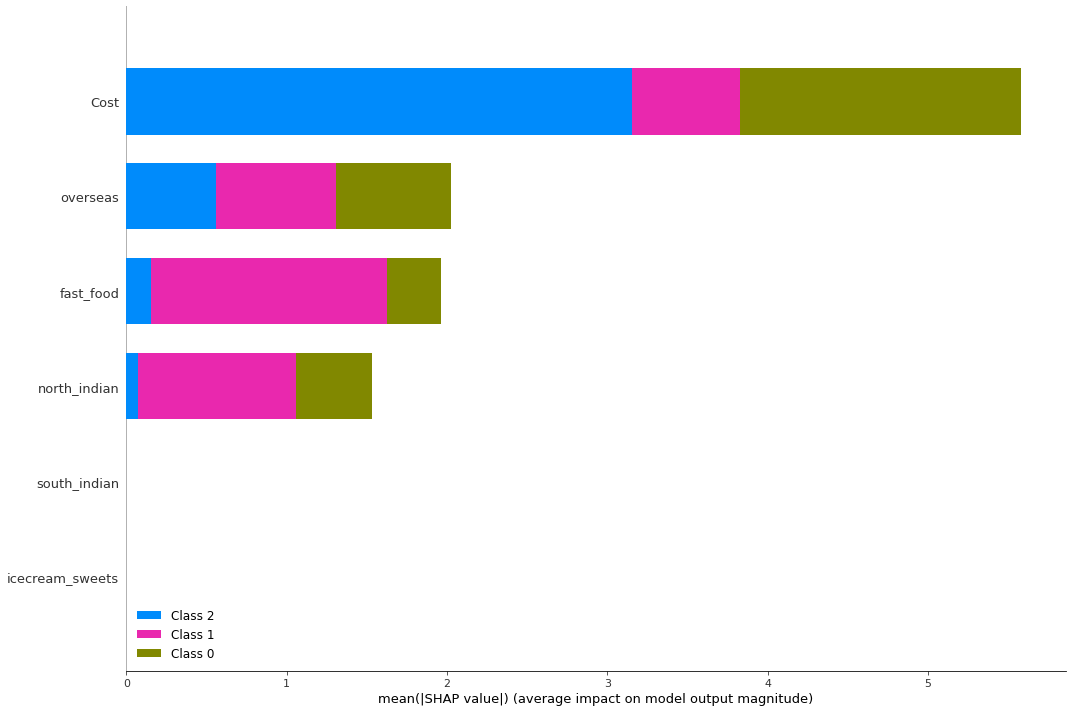

In [ ]:
clf_kp.fit(mark_array, clusters)
shap.initjs()
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(mark_array)
shap.summary_plot(shap_values_kp, X_train, plot_type="bar", plot_size=(15, 10))


As we can see that with KPrototype method for normalized values produced similar results as actual values. Additionaly producing 0.93 f1 score, which is better than previous.